# Timeseries Analysis 

Note: Most models are produced with documentation from https://unit8.com/resources/darts-time-series-made-easy-in-python/, explaining how to use the Darts package, useful for time series analysis. 

* [Stringency Index Model](#1)
    * [Exponential Smoothing](#2)
    * [ARIMA](#3)
* [Egalitarian Democracy Model (to 2020)](#4)
    * [Exponential Smoothing](#5)
    * [ARIMA](#6)
* [Egalitarian Democracy Model (to 2021)](#7)
    * [Exponential Smoothing](#8)
    * [ARIMA](#9)

## Prep

In [208]:
# set the working directory 
import os
os.chdir('C:\\Users\\Julia\\Documents\\_UCLA\\DataRes\\Economicron')

In [11]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models import AutoARIMA
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [15]:
# designating the model functions for later use
model = ExponentialSmoothing()
model_aarima = AutoARIMA()

## Stringency Index Model  <a class="anchor" id="1"></a>

In [70]:
final = pd.read_csv('final_dataset.csv')

In [71]:
final.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
1,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
2,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
3,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
4,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0


In [75]:
# group data by date and find the mean resulting StringencyIndex
grouped = final.groupby('DATE').agg({'StringencyIndex': ['mean']})
grouped.columns = ['StringencyIndex']
grouped = grouped.reset_index()
grouped.head(10)

,DATE,StringencyIndex
0,2020-01-01,0.524497
1,2020-01-02,0.627302
2,2020-01-03,0.656720
3,2020-01-04,0.656720
4,2020-01-05,0.671429
5,2020-01-06,0.700794
6,2020-01-07,0.715503
7,2020-01-08,0.744921
8,2020-01-09,0.774339
9,2020-01-10,0.774339


In [76]:
# convert DATE col to datetime object
grouped['DATE'] = pd.to_datetime(grouped['DATE'])

In [77]:
grouped.head()

,DATE,StringencyIndex
0,2020-01-01,0.524497
1,2020-01-02,0.627302
2,2020-01-03,0.656720
3,2020-01-04,0.656720
4,2020-01-05,0.671429


In [62]:
# create a time series
series = TimeSeries.from_dataframe(grouped, 'historical_date', 'v2x_egaldem')

In [81]:
# split the time series into the testing and training set 
# testing starts at September 9, 2020
train, val = series.split_before(pd.Timestamp('20200901'))

In [85]:
model.fit(train)
prediction = model.predict(len(val))

### Exponential Smoothing  <a class="anchor" id="2"></a>

''

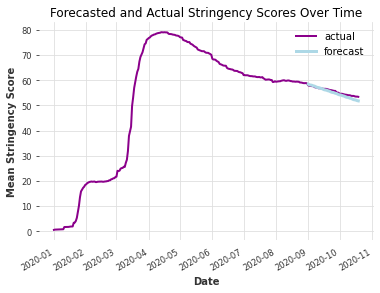

In [175]:
series.plot(label='actual', color = 'darkmagenta')
prediction.plot(label='forecast', lw=3, color = 'lightblue')
plt.legend()
plt.title("Forecasted and Actual Stringency Scores Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Stringency Score")
;

### AARIMA  <a class="anchor" id="3"></a>

In [88]:
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

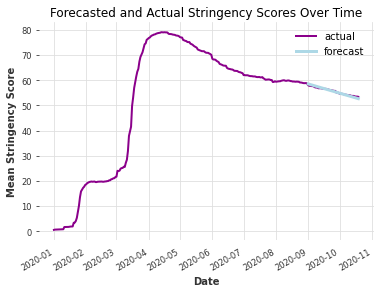

In [176]:
series.plot(label='actual', color = 'darkmagenta')
prediction_aarima.plot(label='forecast', lw=3, color = 'lightblue')
plt.title("Forecasted and Actual Stringency Scores Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Stringency Score")
plt.legend();

## Egalitarian Democracy Model (to 2020) <a class="anchor" id="4"></a>

In [132]:
# due to issues with Darts' ability to recognize years, the labels for the data are off and will be corrected later
cont = pd.read_csv('cont_col.csv')

In [133]:
cont.head()

,historical_date,v2x_egaldem
0,12/1/1980,0.325466
1,12/2/1980,0.327168
2,12/3/1980,0.329301
3,12/4/1980,0.332707
4,12/5/1980,0.341032


In [134]:
cont.historical_date = pd.to_datetime(cont.historical_date)

In [135]:
# creating a time series
series2 = TimeSeries.from_dataframe(cont, 'historical_date', 'v2x_egaldem')

In [205]:
# split our training and testing sets
train2, val2 = series2.split_before(pd.Timestamp('19810108'))

In [178]:
# taking a look at val2
val2

<TimeSeries (DataArray) (historical_date: 3, component: 1, sample: 1)>
array([[[0.42955538]],

       [[0.4252058 ]],

       [[0.41908007]]])
Coordinates:
  * historical_date  (historical_date) datetime64[ns] 1981-01-08 ... 1981-01-10
  * component        (component) object 'v2x_egaldem'
Dimensions without coordinates: sample

### Exponential Smoothing  <a class="anchor" id="5"></a>

In [206]:
model.fit(train2)
prediction2 = model.predict(len(val2))

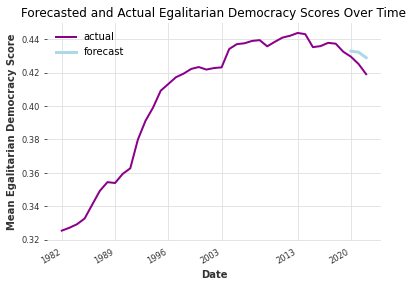

In [223]:
series2.plot(label='actual', color = "darkmagenta")
prediction2.plot(label='forecast', lw=3, color = "lightblue")
plt.title("Forecasted and Actual Egalitarian Democracy Scores Over Time")
plt.xlabel("Date")
# fix date issue from original columns
plt.xticks(['1980-12-01', '1980-12-08', '1980-12-15', '1980-12-22', '1981-01-01', '1981-01-08'], ['1982', '1989', '1996', '2003', '2013', '2020'])
plt.ylabel("Mean Egalitarian Democracy Score")
plt.legend();

### AARIMA  <a class="anchor" id="6"></a>

In [191]:
model_aarima.fit(train2)
prediction_aarima2 = model_aarima.predict(len(val2))

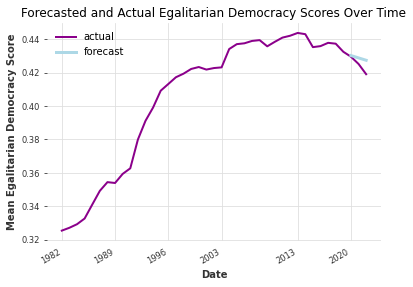

In [224]:
series2.plot(label='actual', color = "darkmagenta")
prediction_aarima2.plot(label='forecast', lw=3, color = 'lightblue')
plt.legend()
plt.title("Forecasted and Actual Egalitarian Democracy Scores Over Time")
plt.xticks(['1980-12-01', '1980-12-08', '1980-12-15', '1980-12-22', '1981-01-01', '1981-01-08'], ['1982', '1989', '1996', '2003', '2013', '2020'])
plt.xlabel("Date")
plt.ylabel("Mean Egalitarian Democracy Score")
plt.show();

## Unemployment

In [3]:
import pandas as pd

In [4]:
dem = pd.read_csv('democracy_final.csv')

In [5]:
dem.head()

,country_name,year,historical_date,v2x_libdem,v2x_polyarchy,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,...,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr,v2x_partipdem,v2xdd_dd,v2xel_regelec,v2x_egal,Continent,GDP,Unemployment_Rate
0,Mexico,1980,12/31/1980,0.135,0.302,0.160,0.533,0.568,1.0,0.146,...,0.383,0.403,0.305,0.172,0.0,0.944,0.376,North America,9.5,NaN
1,Mexico,1981,12/31/1981,0.136,0.307,0.163,0.533,0.598,1.0,0.146,...,0.394,0.403,0.305,0.174,0.0,0.944,0.375,North America,8.5,NaN
2,Mexico,1982,12/31/1982,0.140,0.316,0.165,0.533,0.597,1.0,0.175,...,0.394,0.403,0.305,0.177,0.0,0.944,0.375,North America,-0.5,NaN
3,Mexico,1983,12/31/1983,0.146,0.326,0.169,0.533,0.600,1.0,0.211,...,0.394,0.403,0.305,0.182,0.0,0.944,0.375,North America,-3.5,NaN
4,Mexico,1984,12/31/1984,0.146,0.326,0.169,0.533,0.600,1.0,0.211,...,0.394,0.403,0.305,0.182,0.0,0.944,0.375,North America,3.4,NaN


In [6]:
# store date column as dates 
dem.historical_date = pd.to_datetime(dem.historical_date)

In [7]:
# group data by date and find the mean resulting Unemployment rate
grouped_unemployment = dem.groupby('historical_date').agg({'Unemployment_Rate': ['mean']})
grouped_unemployment.columns = ['Unemployment_Rate']
grouped_unemployment = grouped_unemployment.reset_index()
grouped_unemployment.dropna()
grouped_unemployment.head(10)

,historical_date,Unemployment_Rate
0,1980-12-31,NaN
1,1981-12-31,NaN
2,1982-12-31,NaN
3,1983-12-31,NaN
4,1984-12-31,NaN
5,1985-12-31,NaN
6,1986-12-31,NaN
7,1987-12-31,NaN
8,1988-12-31,NaN
9,1989-12-31,NaN


## Egalitarian Democracy Model (to 2021) <a class="anchor" id="7"></a>

A week before this project was finalized, VDEM released its 2021 democracy data. So let's make one more model!

In [8]:
final_2021 = pd.read_csv('cont_col_2021.csv')
final_2021.head()

,historical_date,v2x_egaldem,actual_date
0,12/31/1900,0.090670,12/31/1900
1,1/1/1901,0.094324,12/31/1901
2,1/2/1901,0.095536,12/31/1902
3,1/3/1901,0.095000,12/31/1903
4,1/4/1901,0.095357,12/31/1904


In [9]:
# change to date column
final_2021['historical_date'] = pd.to_datetime(final_2021['historical_date'])
final_2021.head()

,historical_date,v2x_egaldem,actual_date
0,1900-12-31,0.090670,12/31/1900
1,1901-01-01,0.094324,12/31/1901
2,1901-01-02,0.095536,12/31/1902
3,1901-01-03,0.095000,12/31/1903
4,1901-01-04,0.095357,12/31/1904


In [12]:
# create a time series
series3 = TimeSeries.from_dataframe(final_2021, 'historical_date', 'v2x_egaldem')

In [13]:
train3, val3 = series3.split_before(pd.Timestamp('19010425'))

In [16]:
model.fit(train3)
prediction3 = model.predict(len(val3))

In [18]:
from matplotlib.pyplot import figure

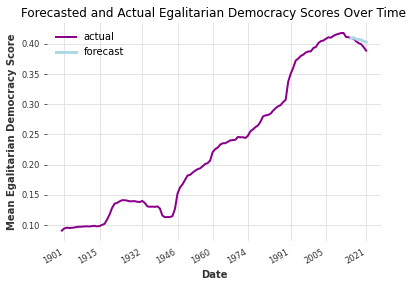

In [26]:
series3.plot(label='actual', color = "darkmagenta")
prediction3.plot(label='forecast', lw=3, color = "lightblue")
plt.title("Forecasted and Actual Egalitarian Democracy Scores Over Time")
plt.xlabel("Date")
# fix date issue from original columns
plt.xticks(['1901-01-01', '1901-01-15', '1901-02-01', '1901-02-15', '1901-03-01', '1901-03-15', '1901-04-01', '1901-04-15', '1901-05-01'], ['1901', '1915', '1932', '1946', '1960', '1974', '1991', '2005', '2021'])
plt.ylabel("Mean Egalitarian Democracy Score")
plt.legend();